<a href="https://colab.research.google.com/github/denniesbor/NLP-Project/blob/testing/HouseReps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NLP Analysis of House Reps**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import wordcloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

sns.set(rc={'figure.figsize':(20,10)})

In [3]:
# !cp /content/TweetsPD.csv /content/drive/MyDrive/Summer2022

### Load Data

In [4]:
# read csv file

df = pd.read_csv('/content/drive/MyDrive/Summer2022/TweetsPD.csv')
# change date col to datetime obj
df.time_stamp = pd.to_datetime(df.time_stamp)


In [5]:
df.head(5)

,screen_name,tweets,party,time_stamp
0,RepAdams,Early voting for Charlotte City Council electi...,D,2022-07-07 21:27:29+00:00
1,RepAdams,#BlackGirlMagic https://t.co/0liU0LZk0j,D,2022-07-07 20:47:50+00:00
2,RepAdams,Congrats to Megan Rapinoe and all of today's P...,D,2022-07-07 19:24:26+00:00
3,RepAdams,16 million Yemenis - including 2 million child...,D,2022-07-07 15:57:15+00:00
4,RepAdams,Please join us at Davidson Town Hall and Corne...,D,2022-07-07 15:50:26+00:00


### Clean Tweets

In [6]:
def clean_tweets(tweet:str):

  """ This function cleans the tweets

  Attrs
  ---------
  input: str
    tweet
  Returns
  ---------
  output: str
    clean tweet 
  """
  
  tweet = tweet.lower()

  #Remove twitter handlers
  tweet = re.sub('@[^\s]+','',tweet)

  #remove hashtags
  tweet = re.sub(r'\B#\S+','',tweet)

  # Remove URLS
  tweet = re.sub(r"http\S+", "", tweet)

  #remove all single characters
  tweet = re.sub(r'\s+[a-zA-Z]\s+', '', tweet)

  # Substituting multiple spaces with single space
  tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

  # Remove all the special characters
  tweet = ' '.join(re.findall(r'\w+', tweet))

  return tweet

## EDA

In [7]:
# apply the function

df.tweets = df.tweets.apply(clean_tweets)

In [8]:
df.head(3)

,screen_name,tweets,party,time_stamp
0,RepAdams,early voting for charlotte city council electi...,D,2022-07-07 21:27:29+00:00
1,RepAdams,,D,2022-07-07 20:47:50+00:00
2,RepAdams,congrats to megan rapinoe and all of today s p...,D,2022-07-07 19:24:26+00:00


In [9]:
# remove empty tweets
df = df[df.tweets != '']
df.reset_index(inplace=True, drop=True)
df.head(5)

,screen_name,tweets,party,time_stamp
0,RepAdams,early voting for charlotte city council electi...,D,2022-07-07 21:27:29+00:00
1,RepAdams,congrats to megan rapinoe and all of today s p...,D,2022-07-07 19:24:26+00:00
2,RepAdams,16 million yemenis including 2 million childre...,D,2022-07-07 15:57:15+00:00
3,RepAdams,please join us at davidson town hall and corne...,D,2022-07-07 15:50:26+00:00
4,RepAdams,early voting for city of charlotte elections b...,D,2022-07-07 12:02:40+00:00


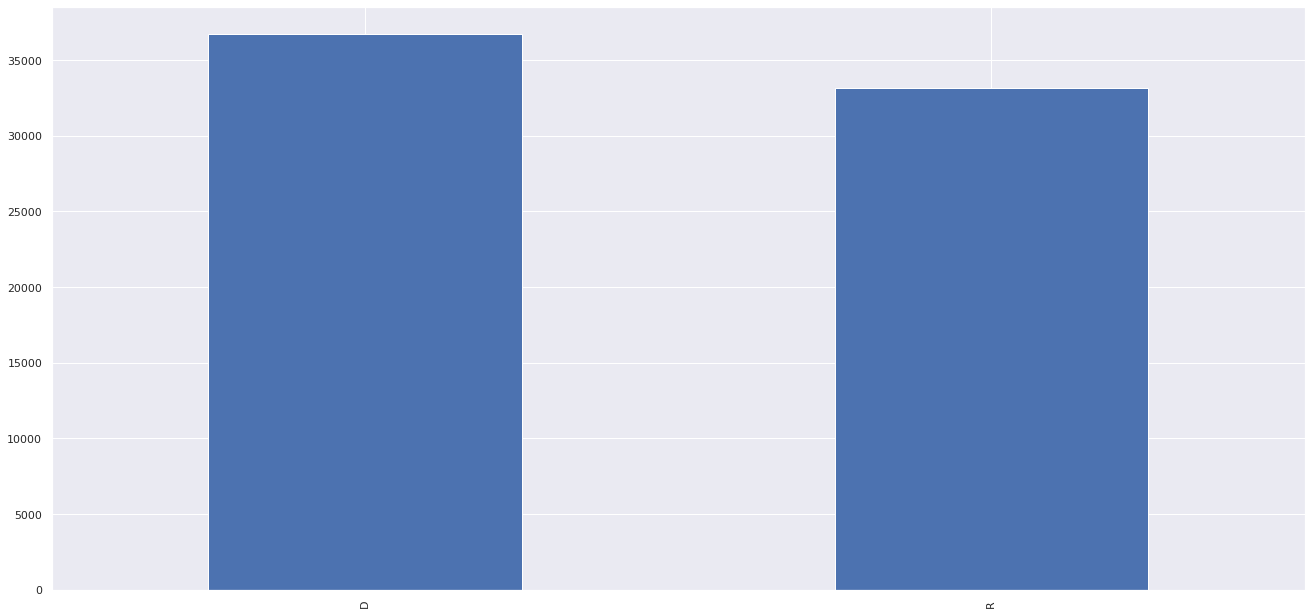

In [10]:
# tweet counts of each party
df.party.value_counts().plot(kind='bar')

In [11]:
df.shape

(70032, 4)

In [12]:
# drop duplicates

df = df.drop_duplicates(subset = ['tweets'])
df.reset_index(inplace=True, drop=False)

In [13]:
df.head(5)

,index,screen_name,tweets,party,time_stamp
0,0,RepAdams,early voting for charlotte city council electi...,D,2022-07-07 21:27:29+00:00
1,1,RepAdams,congrats to megan rapinoe and all of today s p...,D,2022-07-07 19:24:26+00:00
2,2,RepAdams,16 million yemenis including 2 million childre...,D,2022-07-07 15:57:15+00:00
3,3,RepAdams,please join us at davidson town hall and corne...,D,2022-07-07 15:50:26+00:00
4,4,RepAdams,early voting for city of charlotte elections b...,D,2022-07-07 12:02:40+00:00


In [14]:
# query democrats and reps tweets

dem_df = df[df.party=='D']
rep_df = df[df.party=='R']

### WC Visualization

In [ ]:
stopwords_set = set(STOPWORDS)


# update stopwords set
stopwords_set.update(['s','will','amp','must'])


fig = plt.figure(figsize=(16,8), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)
ax0 = fig.add_subplot(spec[0, :])
plt.title('All Tweets WordCloud',fontsize=12,fontweight='bold')
# wordcloud = WordCloud(background_color='white',
#                           stopwords=stopwords_set,
#                           max_words=300,
#                           max_font_size=40, 
#                           random_state=42
#                          ).generate(str(df['tweets']))
wordcloud = WordCloud(stopwords=stopwords_set,
                     scale=2,
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 300, 
                      collocations=False, 
                      normalize_plurals=False).generate(str(df['tweets']))
plt.imshow(wordcloud)
plt.axis('off')

# WC democrats
ax10 = fig.add_subplot(spec[1, 0])
plt.title('Democrats Tweets WordCloud',fontsize=12,fontweight='bold')
wordcloud = WordCloud(stopwords=stopwords_set,
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 300, 
                      collocations=False, 
                      normalize_plurals=False).generate(str(dem_df['tweets']))
plt.imshow(wordcloud)
plt.axis('off')

# WC republicans
ax11 = fig.add_subplot(spec[1, 1])
plt.title('Republicans Tweets WordCloud',fontsize=12,fontweight='bold')
wordcloud = WordCloud(stopwords=stopwords_set,
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 300, 
                      collocations=False, 
                      normalize_plurals=False).generate(str(rep_df['tweets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Plot of N-grams

Ngrams are simply contiguous sequences of n words. If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on

In [ ]:
# plot of the top ngrams
def _get_top_ngram(corpus, n=None):
  ''' Function that sorts top ngrams in descending order'''

  vec = CountVectorizer(ngram_range=(n, n),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) 
                for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:10]


  
def plot_top_ngrams_barchart(text: pd.DataFrame, n=2):

  ''' Function to plot ngrams.

  Parameters:
  ------------
  input: pandas df
    dataframe of tweets
  
  Returns
  ------------
  output: map obj
  '''

  top_n_bigrams=_get_top_ngram(text,n)[:10]
  x,y=map(list,zip(*top_n_bigrams))

  return x, y

# plot 
x, y = plot_top_ngrams_barchart(df['tweets'], n=3)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Trigrams of All Tweets')
sns.barplot(x=y,y=x)
plt.show()


In [ ]:
# plot the N-grams of reps and dems

def plot_ngrams(n:int=2):

  ''' function which returns the figure obj of the ngram plots
    
    parameters
    -------------
    input: integer
      number of ngrams
    
    output: matplotlib figure obj
      fig object
  '''
  name = n
  if n == 2: name =  'Bi'
  elif n == 3: name = 'Tri'
  else: name == n;


  # plot 
  x_rep, y_rep = plot_top_ngrams_barchart(rep_df['tweets'], n=n)
  x_dem, y_dem = plot_top_ngrams_barchart(dem_df['tweets'], n=n)


  fig = plt.figure(figsize=(16,8), constrained_layout=True)
  spec = fig.add_gridspec(ncols=2, nrows=1)

  ax0 = fig.add_subplot(spec[0, 0])
  sns.barplot(x=x_rep,y=y_rep)
  plt.xticks(rotation=90)
  ax0.set_title(f'{name}-grams of Republican Tweets')

  ax1 = fig.add_subplot(spec[0, 1])
  sns.barplot(x=x_dem,y=y_dem)
  plt.xticks(rotation=90)
  ax1.set_title(f'{name}-grams of Dems Tweets')
  plt.show()

  return fig

# bigrams

fig = plot_ngrams(n=2)


In [ ]:
# trigrams

fig = plot_ngrams(n=3)

In [ ]:
# 4grams

fig = plot_ngrams(n=4)

###  Word Cloud of Bigrams and Trigrams

In [ ]:
# wordCloud for bigrams and bigrams
def get_top_ngram(corpus, n=None):

  '''Function that sorts top ngrams in descending order
  
  '''

  vec = CountVectorizer(ngram_range=(n, n),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  
  join_n_grams = [''.join(word.split(' ')) for word, idx in vec.vocabulary_.items()]

  return ' '.join(join_n_grams)

In [ ]:
# bi-grams wc

tweet_string = get_top_ngram(df['tweets'], n=2)
wordcloud = WordCloud(width = 2000, 
                      height = 1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 75, 
                      collocations=False, 
                      normalize_plurals=False).generate(tweet_string)

plt.imshow(wordcloud)
plt.title('Bigrams All Tweets')
plt.axis('off')

In [ ]:
# tri-grams wc

tweet_string = get_top_ngram(df['tweets'], n=3)
print(tweet_string[0:100])
wordcloud = WordCloud(width = 2000, 
                      height = 1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 75, 
                      collocations=False, 
                      normalize_plurals=False).generate(tweet_string)

plt.imshow(wordcloud)
plt.title('Trigrams All Tweets')
plt.axis('off')

In [ ]:
#  plot Trigrams as WC of dems and reps

fig = plt.figure(figsize=(16,8), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1)

bi_dem = get_top_ngram(dem_df['tweets'], n=3)
bi_rep = get_top_ngram(rep_df['tweets'], n=3)

# WC bigrams democrats
ax0 = fig.add_subplot(spec[0, 0])
plt.title('Democrats Trigrams WordCloud',fontsize=12,fontweight='bold')
wordcloud = WordCloud(stopwords=stopwords_set,
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 75, 
                      collocations=False, 
                      normalize_plurals=False).generate(bi_dem)
plt.imshow(wordcloud)
plt.axis('off')

# WC bigrams republicans
ax1 = fig.add_subplot(spec[0, 1])
plt.title('Republicans Trigrams WordCloud',fontsize=12,fontweight='bold')
wordcloud = WordCloud(stopwords=stopwords_set,
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words = 75, 
                      collocations=False, 
                      normalize_plurals=False).generate(bi_rep)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### TreeMap 

In [ ]:
# all tweets

def all_words_array(df, name: str =''):

  ''' function which takes a dataframe of tweets and returns tree map
      as a Plotly object
    
    params:
    -----------
    input: pandas dataframe
      df
    
    returns
    ----------
    output: obj
      plotly figure
  '''

  all_words = [item for sublist in [word.split(' ') for word in list(df.tweets)] for item in sublist if item not in stopwords_set]

  all_words=pd.Series(np.array(all_words))

  common_words=all_words.value_counts()[:70].rename_axis('Common Words').reset_index(name='count')

  fig = px.treemap(common_words, path=['Common Words'], values='count',title=f'70 Most Common Words in {name}Tweets')

  return fig



fig = all_words_array(df)
fig.show()

In [ ]:
# democrats

fig = all_words_array(dem_df, 'Dems ')
fig.show()

In [ ]:
# republicans

fig = all_words_array(rep_df, 'Reps ')
fig.show()

### Text Decomposition

In [ ]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD,PCA

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

NUMBER_OF_COMPONENTS = 450

CVZ = CountVectorizer()
SVD = TruncatedSVD(NUMBER_OF_COMPONENTS)

text_data = df.tweets.copy()
text_data = text_data.apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS and len(word) > 1]).strip())

stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()

text_data = text_data.apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
text_data = text_data.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

C_vector = CVZ.fit_transform(text_data)


pc_matrix = SVD.fit_transform(C_vector)

evr = SVD.explained_variance_ratio_
total_var = evr.sum() * 100
cumsum_evr = np.cumsum(evr)

trace1 = {
    "name": "individual explained variance", 
    "type": "bar", 
    'y':evr}
trace2 = {
    "name": "cumulative explained variance", 
    "type": "scatter", 
     'y':cumsum_evr}
data = [trace1, trace2]
layout = {
    "xaxis": {"title": "Principal components"}, 
    "yaxis": {"title": "Explained variance ratio"},
  }
fig = go.Figure(data=data, layout=layout)
fig.update_layout(     title='{:.2f}% of the Tweet Text Variance Can Be Explained Using {} Words'.format(np.sum(evr)*100,NUMBER_OF_COMPONENTS))
fig.show()

In [ ]:
# best_fearures = [[CVZ.get_feature_names_out()[i],SVD.components_[0][i]] for i in SVD.components_[0].argsort()[::-1]]
# worddf = pd.DataFrame(np.array(best_fearures[:450])[:,0]).rename(columns={0:'Word'})
# worddf['Explained Variance'] =  np.round(evr*100,2)
# worddf['Explained Variance'] =worddf['Explained Variance'].apply(lambda x:str(x)+'%')
# app = []
# for word in worddf.Word:
#     total_count = 0
#     for tweet in text_data:
#         if tweet.find(word)!= -1:
#             total_count+=1
#     app.append(total_count)
# worddf['Appeared_On_X_Tweets'] = app
# worddf

# fig = go.Figure()
# fig.add_trace(
#     go.Table(
#         header=dict(
#             values=['<b>Word<b>',"<b>Explaines X% of Variance<b>",'<b>Appeared On X Tweets<b>'],
#             font=dict(size=19,family="Lato"),
#             align="center"
#         ),
#         cells=dict(
#             values=[worddf[k].tolist() for k in ['Word',"Explained Variance",'Appeared_On_X_Tweets']],
#             align = "center")
#     ),
    
# )

# fig.show()

In [ ]:
worddf.to_csv('/content/drive/MyDrive/Summer2022/wordf.csv', index=False)

## Sentiment Analysis with Vader

Vader Sentiment Analysis returns probabilities of given sentences as positive, negative, or neutral and according to developers it's attuned to sentiments expressed in social media

In [ ]:
#Vader Sentiment Analysis

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sid = SIA()
df['sentiments'] = df['tweets'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

# extract scores of sentiments. 0.00001 added incase of a score of 0
df['Positive Sentiment'] = df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
df['Neutral Sentiment'] = df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
df['Negative Sentiment'] = df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
df['Compound Sentiment'] = df['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
df['Sentiment Value'] = df['Compound Sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
df.drop(columns=['sentiments'],inplace=True)

In [ ]:
# query democrats and reps tweets

dem_df = df[df.party=='D']
rep_df = df[df.party=='R']

df.head(5)

#### Distribution of Sentiments

In [ ]:
# distribution of sentiments

fig = plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment Value',data=df)
plt.show()

In [ ]:
# distribution of sentiments across republicans and dems
sent_dist = df.groupby(['party','Sentiment Value'])['Compound Sentiment'].count().reset_index()

fig = plt.figure(figsize=(12,6))
sns.barplot(x="party", y="Compound Sentiment", hue="Sentiment Value", data=sent_dist)
plt.ylabel('Count')
plt.show()

#### Sentiment Tree Map

In [ ]:
# all tweets

df_negative_all = df[df['Sentiment Value']=='negative']
df_positive_all = df[df['Sentiment Value']=='positive']
df_neutral_all = df[df['Sentiment Value']=='neutral']

# negative
fig = all_words_array(df_negative_all, 'Negative ')
fig.show()

# positive
fig = all_words_array(df_positive_all, 'Positive ')
fig.show()

# neutral
fig = all_words_array(df_neutral_all, 'Neutral ')
fig.show()

In [ ]:
# specific tweets to dems and republicans

# democrats
df_negative_dem = dem_df[dem_df['Sentiment Value']=='negative']
df_positive_dem = dem_df[dem_df['Sentiment Value']=='positive']
df_neutral_dem = dem_df[dem_df['Sentiment Value']=='neutral']

# republicans
df_negative_rep = rep_df[rep_df['Sentiment Value']=='negative']
df_positive_rep = rep_df[rep_df['Sentiment Value']=='positive']
df_neutral_rep = rep_df[rep_df['Sentiment Value']=='neutral']

# negative\
df_var_names = ['df_negative_dem','df_positive_dem','df_neutral_dem','df_negative_rep','df_positive_rep','df_neutral_rep']
list_df = [df_negative_dem,df_positive_dem,df_neutral_dem,df_negative_rep,df_positive_rep,df_neutral_rep]

for i, df_ in enumerate(list_df):

  fig = all_words_array(df_, f'{df_var_names[i][3:11].capitalize()} {df_var_names[i][-3:].capitalize()} ')
  fig.show()


### Time Based Analysis

In [ ]:
df.head(5)

In [ ]:
# plot tweet sentiment timeseries

def get_time_sentiments(df, name:str='All'):

  ''' function which compute sentiments of tweets over time'''

  df["time_stamp"] = pd.to_datetime(df.time_stamp)
  df_great_2022 = df[df["time_stamp"] > '2022-01-01']
  timeline = df_great_2022.resample('D', on='time_stamp')["Sentiment Value"].value_counts().unstack(1)

  timeline.reset_index(inplace=True)

  timeline = timeline.melt("time_stamp", var_name='sentiment',  value_name='vals')

  fig = plt.figure(figsize=(18,6))
  sns.set_style("whitegrid")
  sns.lineplot(x="time_stamp", y="vals", hue="sentiment", data=timeline, palette=["r", "g","b"])
  plt.title(f'Time Based Analysis of {name} Tweets Sentiment',fontsize=12,fontweight='bold')

  return fig

fig = get_time_sentiments(df)
plt.show()

In [ ]:
# time analysis of democrats tweets

fig = get_time_sentiments(dem_df, 'Democrats')
plt.show()

In [ ]:
fig = get_time_sentiments(rep_df, 'Republicans')
plt.show()

### Probability Distributions

In [ ]:

fig = plt.figure(figsize=(16,8), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)
ax0 = fig.add_subplot(spec[0, :])
plt.title('PD Distribution Of Sentiments Across Tweets',fontsize=14,fontweight='bold')
sns.kdeplot(df['Negative Sentiment'],label='Negative Sentiment',lw=2.5,shade=True)
sns.kdeplot(df['Positive Sentiment'],label='Positive Sentiment',lw=2.5,shade=True)
sns.kdeplot(df['Neutral Sentiment'], label='Neutral Sentiment',lw=2.5, shade=True)
plt.legend()

# plot democrats
ax10 = fig.add_subplot(spec[1, 0])
plt.title('PD Distribution Of Sentiments - Democrats',fontsize=12,fontweight='bold')
sns.kdeplot(dem_df['Negative Sentiment'],label='Negative Sentiment',lw=2.5,shade=True)
sns.kdeplot(dem_df['Positive Sentiment'],label='Positive Sentiment',lw=2.5,shade=True)
sns.kdeplot(dem_df['Neutral Sentiment'], label='Neutral Sentiment',lw=2.5, shade=True)
plt.xlabel('Sentiment Value',fontsize=14)

# plot republicans
ax11 = fig.add_subplot(spec[1, 1])
plt.title('PD Distribution Of Sentiments - Republicans',fontsize=12,fontweight='bold')
sns.kdeplot(rep_df['Negative Sentiment'],label='Negative Sentiment',lw=2.5,shade=True)
sns.kdeplot(rep_df['Positive Sentiment'],label='Positive Sentiment',lw=2.5,shade=True)
sns.kdeplot(rep_df['Neutral Sentiment'], label='Neutral Sentiment',lw=2.5, shade=True)
plt.xlabel('Sentiment Value',fontsize=14)
ax11.set_yticklabels([])
ax11.set(ylabel=None)
plt.show()

## **Emotion Analysis**

Emotion analysis is the process of identifying and analyzing the underlying emotions expressed in textual data. Emotions include; fear, anger, happiness, sadness, love, inspiration, or neutral.

In [ ]:
#  install the hugging face transformer pipeline

!pip install transformers -q

In [ ]:
#  import transformer pipeline

from transformers import pipeline

In [ ]:
# download emoroberta

emotion = pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa', device=1)

In [ ]:
# extract emotions and emotion score of each tweet

def get_emotion_label (text):
  """ Function to get the emotion lables score. 

  Parameters
  ----------
  tweet: str
    tweet text
    
  Returns
  -------
  emotion: str
    emotion label
    
  """

  return (emotion(text)[0]['label'])


def get_emotion_score (text):
  """ Function to get the emotion score. 

  Parameters
  ----------
  tweet: str
    tweet text
    
  Returns
  -------
  score : float
    emotion score.
    
  """

  return (emotion(text)[0]['score'])